# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [4]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [5]:
# Inspect the Tesla search trend and price data

# Shape and columns
print("🔍 Shape of df_tesla:", df_tesla.shape)
print("📋 Columns:", list(df_tesla.columns))
print("\n")

# Display first few rows
display(df_tesla.head())

# Descriptive statistics
print("📊 Summary Statistics:")
display(df_tesla.describe())

# Identify the time series frequency
print("\n🕒 Date Range:")
print("From:", df_tesla["MONTH"].min(), "to", df_tesla["MONTH"].max())
print("Periodicity: Likely Monthly (check date intervals between rows)")


🔍 Shape of df_tesla: (124, 3)
📋 Columns: ['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE']




,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


📊 Summary Statistics:


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007



🕒 Date Range:
From: 2010-06-01 to 2020-09-01
Periodicity: Likely Monthly (check date intervals between rows)


In [6]:
# Explore Google Trend popularity values for Tesla

# Clean column name if needed
search_col = [col for col in df_tesla.columns if "SEARCH" in col.upper()][0]

max_val = df_tesla[search_col].max()
min_val = df_tesla[search_col].min()

print(f'🚗 Largest value for Tesla in Web Search: {max_val}')
print(f'🚙 Smallest value for Tesla in Web Search: {min_val}')

print("""
💬 Note:
Google Trends scales search interest between 0 and 100.
A value of 100 represents the peak search popularity (the month with the highest search volume),
while other values are relative percentages of that peak.
""")


🚗 Largest value for Tesla in Web Search: 31
🚙 Smallest value for Tesla in Web Search: 2

💬 Note:
Google Trends scales search interest between 0 and 100.
A value of 100 represents the peak search popularity (the month with the highest search volume),
while other values are relative percentages of that peak.



### Unemployment Data

In [7]:
# Explore the unemployment dataset
print("🔍 Shape of df_unemployment:", df_unemployment.shape)
print("📋 Columns:", list(df_unemployment.columns))
display(df_unemployment.head())

# Summary stats
display(df_unemployment.describe())

# Check date coverage
print("\n🕒 Date Range:")
print("From:", df_unemployment.iloc[0, 0], "to", df_unemployment.iloc[-1, 0])


🔍 Shape of df_unemployment: (181, 3)
📋 Columns: ['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE']


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000



🕒 Date Range:
From: 2004-01 to 2019-01


In [8]:
# Identify largest and smallest unemployment search interest
search_col = [col for col in df_unemployment.columns if "SEARCH" in col.upper()][0]

max_val = df_unemployment[search_col].max()
min_val = df_unemployment[search_col].min()

print(f'Largest value for "Unemployment Benefits" in Web Search: {max_val}')
print(f'Smallest value for "Unemployment Benefits" in Web Search: {min_val}')

print("""
💬 Note:
A value of 100 means the peak search popularity for that term (the highest month),
and all other values are scaled relative to it.
""")


Largest value for "Unemployment Benefits" in Web Search: 100
Smallest value for "Unemployment Benefits" in Web Search: 14

💬 Note:
A value of 100 means the peak search popularity for that term (the highest month),
and all other values are scaled relative to it.



### Bitcoin

In [9]:
# Explore Bitcoin search trend and price data
print("🔍 Bitcoin Search Data shape:", df_btc_search.shape)
print("📋 Columns:", list(df_btc_search.columns))
print("\n🔍 Bitcoin Price Data shape:", df_btc_price.shape)
print("📋 Columns:", list(df_btc_price.columns))

# Preview
display(df_btc_search.head())
display(df_btc_price.head())


🔍 Bitcoin Search Data shape: (73, 2)
📋 Columns: ['MONTH', 'BTC_NEWS_SEARCH']

🔍 Bitcoin Price Data shape: (2204, 3)
📋 Columns: ['DATE', 'CLOSE', 'VOLUME']


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [10]:
# Identify largest and smallest search popularity for Bitcoin
search_col = [col for col in df_btc_search.columns if "SEARCH" in col.upper()][0]

max_val = df_btc_search[search_col].max()
min_val = df_btc_search[search_col].min()

print(f'📈 Largest BTC News Search: {max_val}')
print(f'📉 Smallest BTC News Search: {min_val}')

print("""
💬 Note:
Google Trends scores are relative — 100 = peak search interest for Bitcoin.
This helps compare popularity across time rather than absolute volume.
""")


📈 Largest BTC News Search: 100
📉 Smallest BTC News Search: 3

💬 Note:
Google Trends scores are relative — 100 = peak search interest for Bitcoin.
This helps compare popularity across time rather than absolute volume.



In [11]:
print(f'largest BTC News Search: ')

largest BTC News Search: 


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [12]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [13]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [14]:
print(f'Number of missing values: ')

Number of missing values: 


**Challenge**: Remove any missing values that you found. 

In [15]:
# Check for missing values in all datasets

print("🔍 Missing values summary:\n")

print(f"Tesla: {df_tesla.isna().sum().sum()} missing values")
print(f"Unemployment: {df_unemployment.isna().sum().sum()} missing values")
print(f"BTC Search: {df_btc_search.isna().sum().sum()} missing values")
print(f"BTC Price: {df_btc_price.isna().sum().sum()} missing values")

print("\n📋 Details per column (if any missing):\n")

print("Tesla:\n", df_tesla.isna().sum()[df_tesla.isna().sum() > 0])
print("\nUnemployment:\n", df_unemployment.isna().sum()[df_unemployment.isna().sum() > 0])
print("\nBTC Search:\n", df_btc_search.isna().sum()[df_btc_search.isna().sum() > 0])
print("\nBTC Price:\n", df_btc_price.isna().sum()[df_btc_price.isna().sum() > 0])


🔍 Missing values summary:

Tesla: 0 missing values
Unemployment: 0 missing values
BTC Search: 0 missing values
BTC Price: 2 missing values

📋 Details per column (if any missing):

Tesla:
 Series([], dtype: int64)

Unemployment:
 Series([], dtype: int64)

BTC Search:
 Series([], dtype: int64)

BTC Price:
 CLOSE     1
VOLUME    1
dtype: int64


In [16]:
# Remove missing values (if any found)

df_tesla.dropna(inplace=True)
df_unemployment.dropna(inplace=True)
df_btc_search.dropna(inplace=True)
df_btc_price.dropna(inplace=True)

print("✅ All missing values removed successfully.")
print(f"Tesla shape: {df_tesla.shape}")
print(f"Unemployment shape: {df_unemployment.shape}")
print(f"BTC Search shape: {df_btc_search.shape}")
print(f"BTC Price shape: {df_btc_price.shape}")


✅ All missing values removed successfully.
Tesla shape: (124, 3)
Unemployment shape: (181, 3)
BTC Search shape: (73, 2)
BTC Price shape: (2203, 3)


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [17]:
# Check data types before conversion

print("🧾 Current dtypes before conversion:\n")
print("Tesla:\n", df_tesla.dtypes)
print("\nUnemployment:\n", df_unemployment.dtypes)
print("\nBTC Search:\n", df_btc_search.dtypes)
print("\nBTC Price:\n", df_btc_price.dtypes)


🧾 Current dtypes before conversion:

Tesla:
 MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

Unemployment:
 MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

BTC Search:
 MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

BTC Price:
 DATE       object
CLOSE     float64
VOLUME    float64
dtype: object


In [18]:
# Convert strings to datetime objects for all datasets

# Tesla
if "MONTH" in df_tesla.columns:
    df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"], errors="coerce")

# Unemployment (Monthly data)
if "MONTH" in df_unemployment.columns:
    df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"], errors="coerce")

# Bitcoin Search (likely weekly)
if "MONTH" in df_btc_search.columns:
    df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"], errors="coerce")
elif "DATE" in df_btc_search.columns:
    df_btc_search["DATE"] = pd.to_datetime(df_btc_search["DATE"], errors="coerce")

# Bitcoin Price (daily data)
if "DATE" in df_btc_price.columns:
    df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"], errors="coerce")

print("✅ Datetime conversion complete.")


✅ Datetime conversion complete.


In [19]:
# Double check that conversion worked

print("📅 Verification of datetime conversion:\n")
print("Tesla 'MONTH' dtype:", df_tesla["MONTH"].dtype)
print("Unemployment 'MONTH' dtype:", df_unemployment["MONTH"].dtype)

if "MONTH" in df_btc_search.columns:
    print("BTC Search 'MONTH' dtype:", df_btc_search["MONTH"].dtype)
else:
    print("BTC Search 'DATE' dtype:", df_btc_search["DATE"].dtype)

print("BTC Price 'DATE' dtype:", df_btc_price["DATE"].dtype)


📅 Verification of datetime conversion:

Tesla 'MONTH' dtype: datetime64[ns]
Unemployment 'MONTH' dtype: datetime64[ns]
BTC Search 'MONTH' dtype: datetime64[ns]
BTC Price 'DATE' dtype: datetime64[ns]


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [20]:
# Convert daily Bitcoin prices to monthly average using .resample()

# Ensure DATE column is the datetime index
df_btc_price.set_index("DATE", inplace=True)

# Resample from daily ('D') to monthly ('M') — take average closing price per month
df_btc_monthly = df_btc_price.resample("M").mean().reset_index()

print("✅ Bitcoin price data successfully resampled to monthly frequency!")
display(df_btc_monthly.head())


✅ Bitcoin price data successfully resampled to monthly frequency!


C:\Users\angel\AppData\Local\Temp\ipykernel_30004\3276260450.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample("M").mean().reset_index()


,DATE,CLOSE,VOLUME
0,2014-09-30,407.182428,2.934864e+07
1,2014-10-31,364.148873,2.912885e+07
2,2014-11-30,366.099799,2.199111e+07
3,2014-12-31,341.267871,1.784201e+07
4,2015-01-31,248.782547,3.544555e+07


🧾 Data type and frequency check:
Date column dtype: datetime64[ns]
Number of rows before: 2203
Number of rows after (monthly): 73


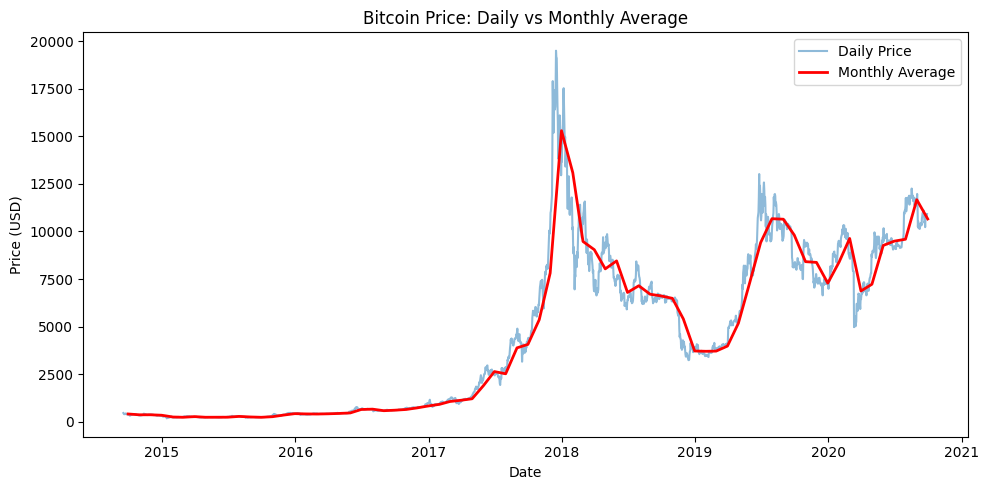

In [21]:
# Verify that conversion was successful
print("🧾 Data type and frequency check:")
print("Date column dtype:", df_btc_monthly["DATE"].dtype)
print("Number of rows before:", len(df_btc_price))
print("Number of rows after (monthly):", len(df_btc_monthly))

# Optional: visualize to confirm pattern looks smooth and monthly
plt.figure(figsize=(10, 5))
plt.plot(df_btc_price.index, df_btc_price["CLOSE"], label="Daily Price", alpha=0.5)
plt.plot(df_btc_monthly["DATE"], df_btc_monthly["CLOSE"], label="Monthly Average", color="red", linewidth=2)
plt.title("Bitcoin Price: Daily vs Monthly Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()


# Data Visualisation

### Notebook Formatting & Style Helpers

In [22]:
# Register date converters to avoid warning messages when plotting datetime objects

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print("✅ Date converters registered successfully (warnings suppressed).")


✅ Date converters registered successfully (warnings suppressed).


In [23]:
# Create locators and formatters for time axis ticks in plots

import matplotlib.dates as mdates

# Configure global formatting for date axes
years = mdates.YearLocator()        # major ticks every year
months = mdates.MonthLocator()      # minor ticks every month
years_fmt = mdates.DateFormatter('%Y')

print("✅ Time axis locators and formatters created.")


✅ Time axis locators and formatters created.


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [26]:
price_col = "TSLA_USD_CLOSE"
search_col = "TSLA_WEB_SEARCH"


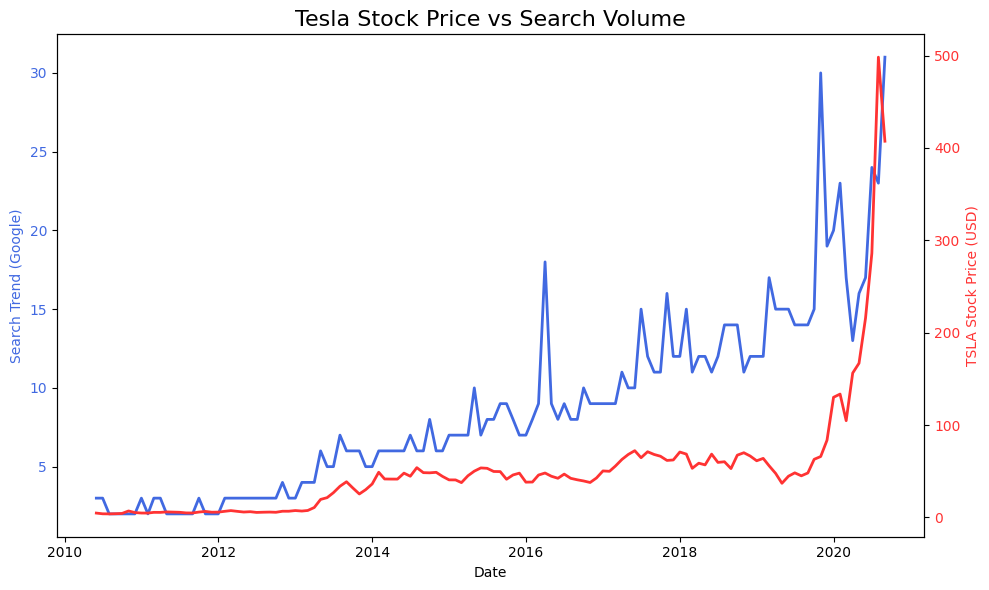

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_tesla["MONTH"], df_tesla[search_col], color="royalblue", linewidth=2, label="Search Trend")
ax1.set_xlabel("Date")
ax1.set_ylabel("Search Trend (Google)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

ax2 = ax1.twinx()
ax2.plot(df_tesla["MONTH"], df_tesla[price_col], color="#FF3333", linewidth=2, label="TSLA Stock Price")
ax2.set_ylabel("TSLA Stock Price (USD)", color="#FF3333")
ax2.tick_params(axis="y", labelcolor="#FF3333")

plt.title("Tesla Stock Price vs Search Volume", fontsize=16)
plt.tight_layout()
plt.show()


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

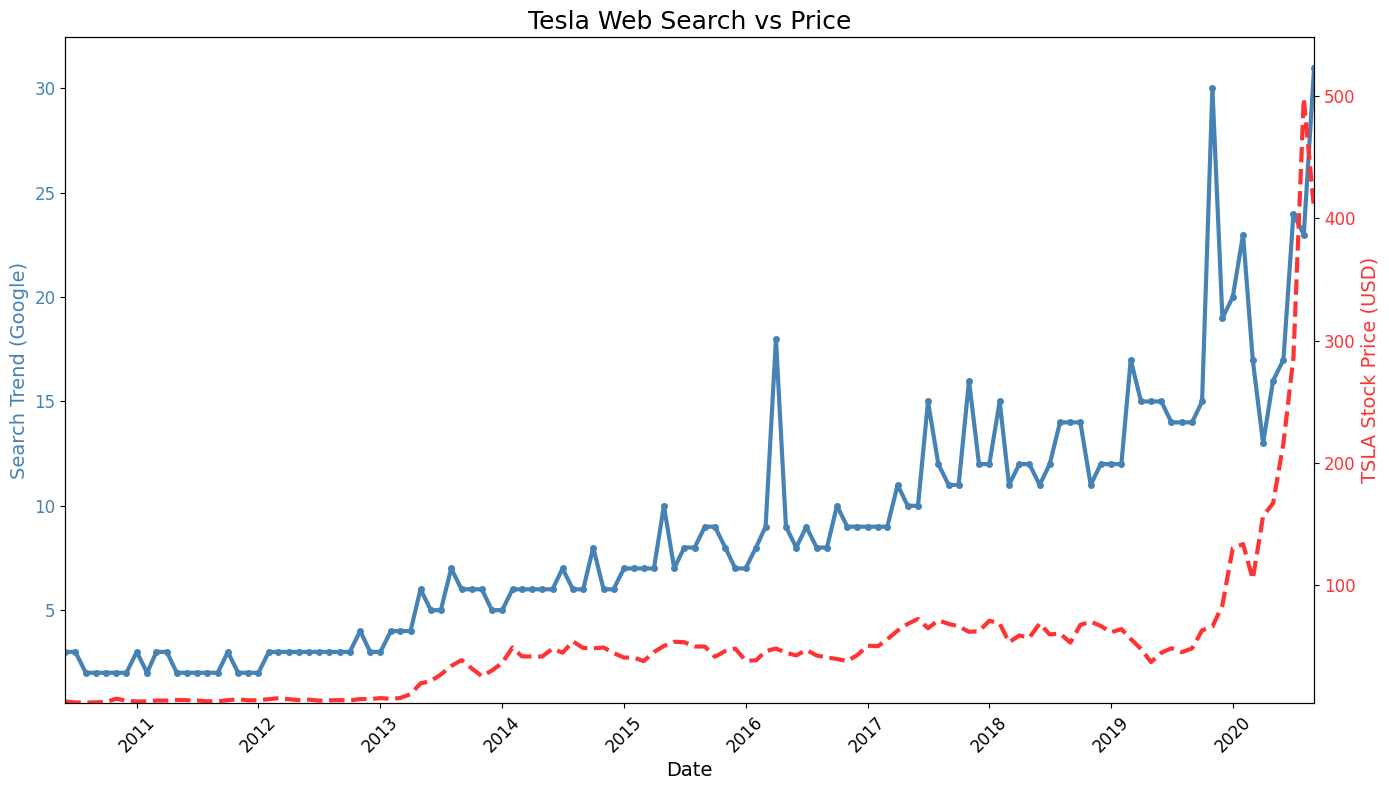

In [28]:
# Simple styling example: set figure size, colors and thicker lines
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)
ax1.plot(df_tesla["MONTH"], df_tesla[search_col], color="steelblue", linewidth=3, marker='o', markersize=4, label="Search Trend")
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Search Trend (Google)", color="steelblue", fontsize=14)
ax1.tick_params(axis="y", labelcolor="steelblue", labelsize=12)
ax1.tick_params(axis="x", labelrotation=45, labelsize=12)

ax2 = ax1.twinx()
ax2.plot(df_tesla["MONTH"], df_tesla[price_col], color="#FF3333", linewidth=3, linestyle='--', label="TSLA Stock Price")
ax2.set_ylabel("TSLA Stock Price (USD)", color="#FF3333", fontsize=14)
ax2.tick_params(axis="y", labelcolor="#FF3333", labelsize=12)

plt.title("Tesla Web Search vs Price", fontsize=18)
ax1.set_xlim(df_tesla["MONTH"].min(), df_tesla["MONTH"].max())
ax2.set_ylim(df_tesla[price_col].min()*0.9, df_tesla[price_col].max()*1.1)
fig.tight_layout()
plt.show()

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

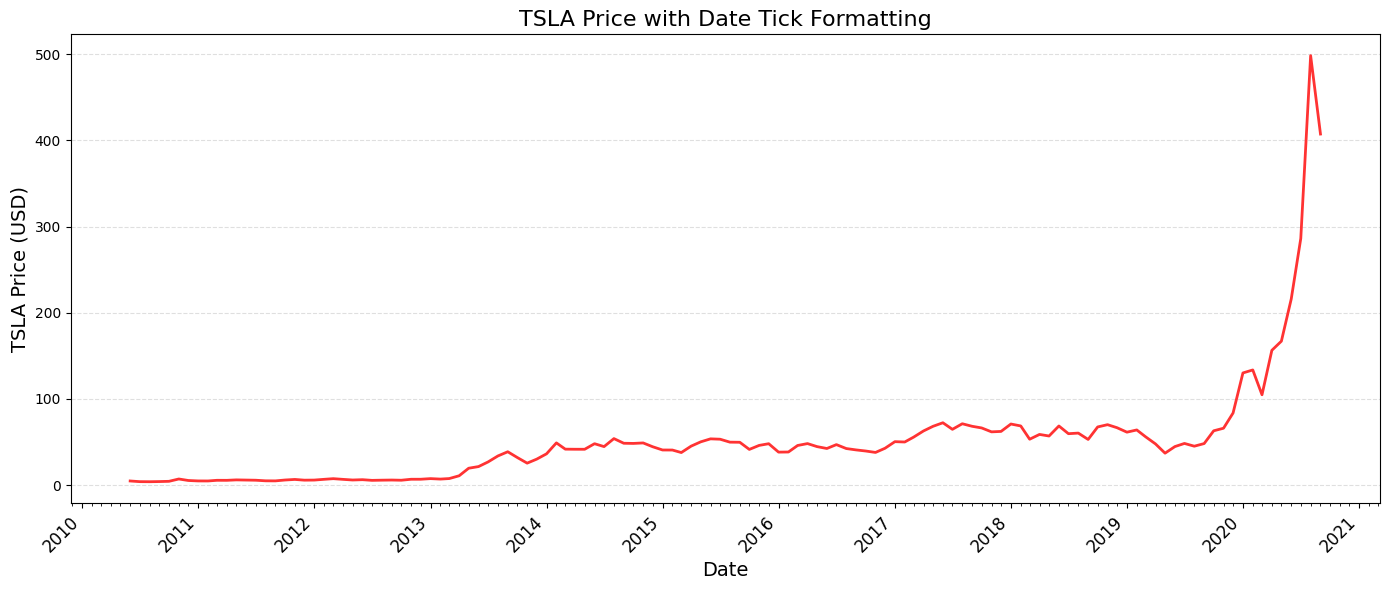

In [29]:
# Improve tick formatting for dates on x-axis using locators and formatters
fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
ax.plot(df_tesla["MONTH"], df_tesla[price_col], color="#FF3333", linewidth=2, label="TSLA Price")
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("TSLA Price (USD)", fontsize=14)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.4)
plt.title("TSLA Price with Date Tick Formatting", fontsize=16)
plt.tight_layout()
plt.show()

How to add tick formatting for dates on the x-axis. 

In [30]:
# (Optional) Demonstration of using formatters for other plots — reuse years/months formatting
# This cell intentionally left simple since formatting is applied per-axes in other cells
print('Date tick formatting helper ready (years, months, years_fmt variables defined).')

Date tick formatting helper ready (years, months, years_fmt variables defined).


### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

C:\Users\angel\AppData\Local\Temp\ipykernel_30004\290697379.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_search_monthly = df_btc_search.set_index('MONTH').resample('M').mean().reset_index()


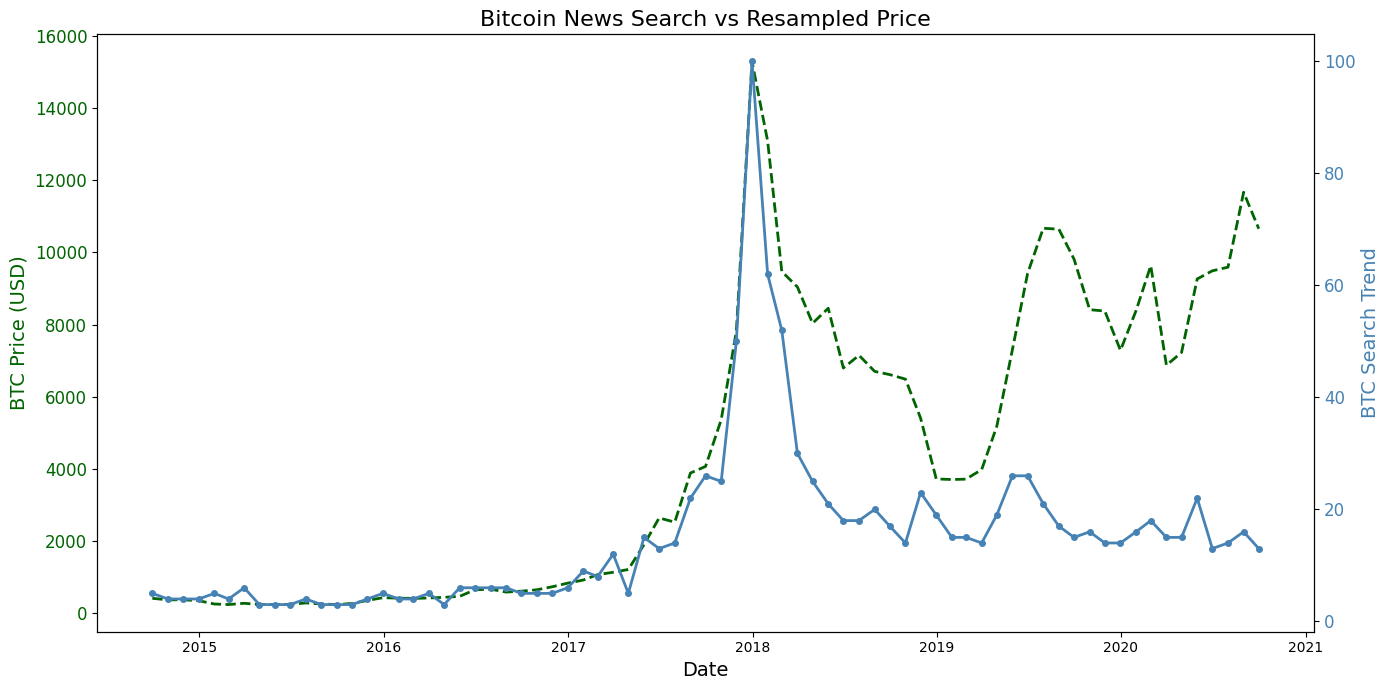

In [31]:
# Bitcoin: Plot resampled monthly price vs search volume
btc_price_col = 'CLOSE' if 'CLOSE' in df_btc_monthly.columns else df_btc_monthly.columns[1]
# find search column in df_btc_search
btc_search_col = [c for c in df_btc_search.columns if 'SEARCH' in c.upper() or 'NEWS' in c.upper() or 'SEARCH' in c.lower()][0]
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)
ax1.plot(df_btc_monthly['DATE'], df_btc_monthly[btc_price_col], color='darkgreen', linestyle='--', linewidth=2, label='BTC Monthly Price')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('BTC Price (USD)', color='darkgreen', fontsize=14)
ax1.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

ax2 = ax1.twinx()
# merge monthly search to monthly price if search is weekly/different index: attempt to convert df_btc_search to monthly by setting date column
if 'MONTH' in df_btc_search.columns:
    df_btc_search_monthly = df_btc_search.set_index('MONTH').resample('M').mean().reset_index()
    search_x = df_btc_search_monthly['MONTH']
    search_y = df_btc_search_monthly[btc_search_col]
else:
    # assume DATE column exists
    date_col = 'DATE' if 'DATE' in df_btc_search.columns else df_btc_search.columns[0]
    df_btc_search[date_col] = pd.to_datetime(df_btc_search[date_col], errors='coerce')
    df_btc_search_monthly = df_btc_search.set_index(date_col).resample('M').mean().reset_index()
    search_x = df_btc_search_monthly[date_col]
    search_y = df_btc_search_monthly[btc_search_col]

ax2.plot(search_x, search_y, color='steelblue', marker='o', linewidth=2, markersize=4, label='BTC Search')
ax2.set_ylabel('BTC Search Trend', color='steelblue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='steelblue', labelsize=12)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=16)
fig.tight_layout()
plt.show()

In [32]:
# Quick summary: Print peak search dates for BTC and Tesla
print('BTC search peak (approx):', df_btc_search[df_btc_search[btc_search_col]==df_btc_search[btc_search_col].max()].head(1))
print('Tesla search peak (approx):', df_tesla[df_tesla[search_col]==df_tesla[search_col].max()].head(1))

BTC search peak (approx):         MONTH  BTC_NEWS_SEARCH
39 2017-12-01              100
Tesla search peak (approx):          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
123 2020-09-01               31      407.339996


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

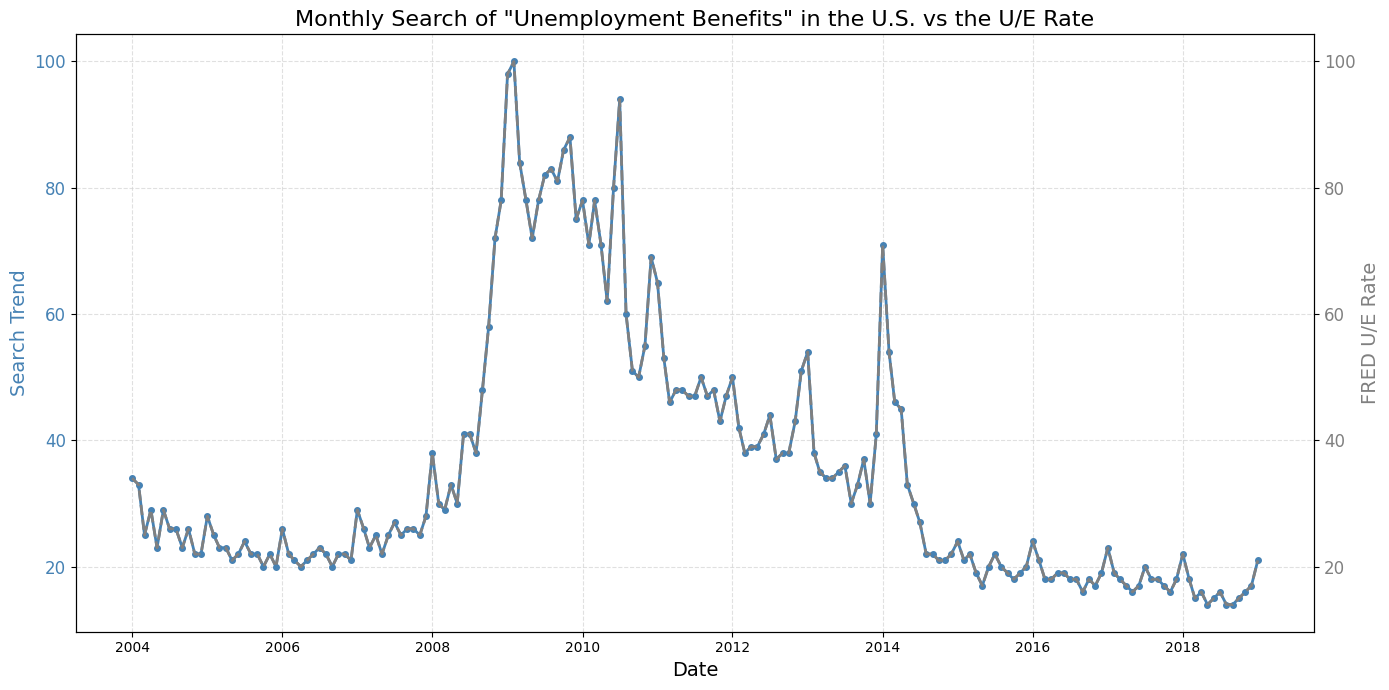

In [34]:
# Unemployment: plot search vs unemployment rate
ue_search_col = [c for c in df_unemployment.columns if 'SEARCH' in c.upper() or 'UNEMP' in c.upper() or 'BENEFIT' in c.upper()][0]
ue_rate_col = [c for c in df_unemployment.columns if 'RATE' in c.upper() or 'UNRATE' in c.upper() or 'UE' in c.upper()][0]
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)
ax1.plot(df_unemployment['MONTH'], df_unemployment[ue_search_col], color='steelblue', linewidth=2, marker='o', markersize=4)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Search Trend', color='steelblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=12)

ax2 = ax1.twinx()
ax2.plot(df_unemployment['MONTH'], df_unemployment[ue_rate_col], color='grey', linewidth=2, linestyle='--')
ax2.set_ylabel('FRED U/E Rate', color='grey', fontsize=14)
ax2.tick_params(axis='y', labelcolor='grey', labelsize=12)

ax1.grid(True, linestyle='--', color='lightgrey', alpha=0.7)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=16)
plt.tight_layout()
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


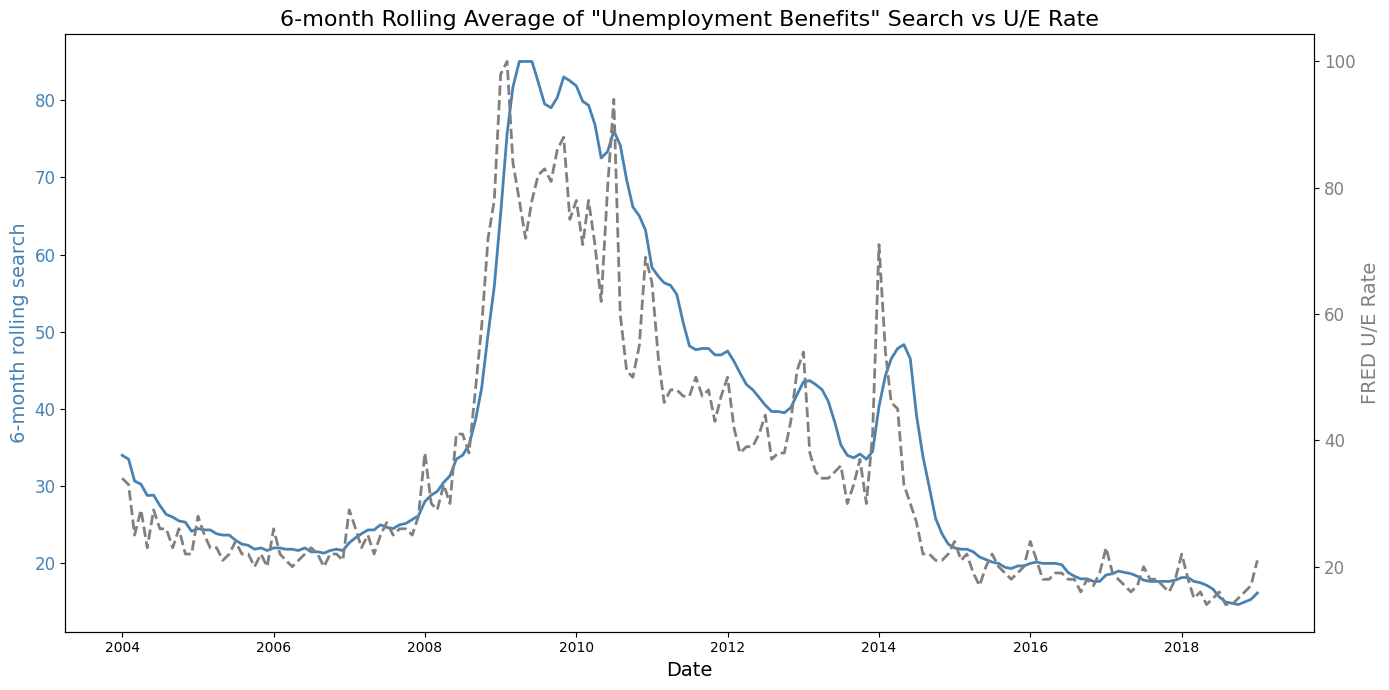

In [35]:
# Calculate and plot 6-month rolling average for search vs unemployment rate
df_unemployment = df_unemployment.set_index('MONTH').sort_index()
# rolling on search column (using min 1 to avoid NaNs early)
roll_search = df_unemployment[ue_search_col].rolling(window=6, min_periods=1).mean()
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=100)
ax1.plot(df_unemployment.index, roll_search, color='steelblue', linewidth=2, label='6-month rolling search')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('6-month rolling search', color='steelblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=12)

ax2 = ax1.twinx()
ax2.plot(df_unemployment.index, df_unemployment[ue_rate_col], color='grey', linewidth=2, linestyle='--', label='U/E Rate')
ax2.set_ylabel('FRED U/E Rate', color='grey', fontsize=14)
ax2.tick_params(axis='y', labelcolor='grey', labelsize=12)

plt.title('6-month Rolling Average of "Unemployment Benefits" Search vs U/E Rate', fontsize=16)
fig.tight_layout()
plt.show()
# Reset index to original form for downstream cells
df_unemployment = df_unemployment.reset_index()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [36]:
# Load the extended unemployment file that includes 2020 and plot same chart
try:
    df_unemployment_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
    df_unemployment_2020['MONTH'] = pd.to_datetime(df_unemployment_2020['MONTH'], errors='coerce')
    print('Loaded UE 2004-20 file — shape:', df_unemployment_2020.shape)
    display(df_unemployment_2020.head())
except Exception as e:
    print('Could not load UE 2004-20 file:', e)

Loaded UE 2004-20 file — shape: (200, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


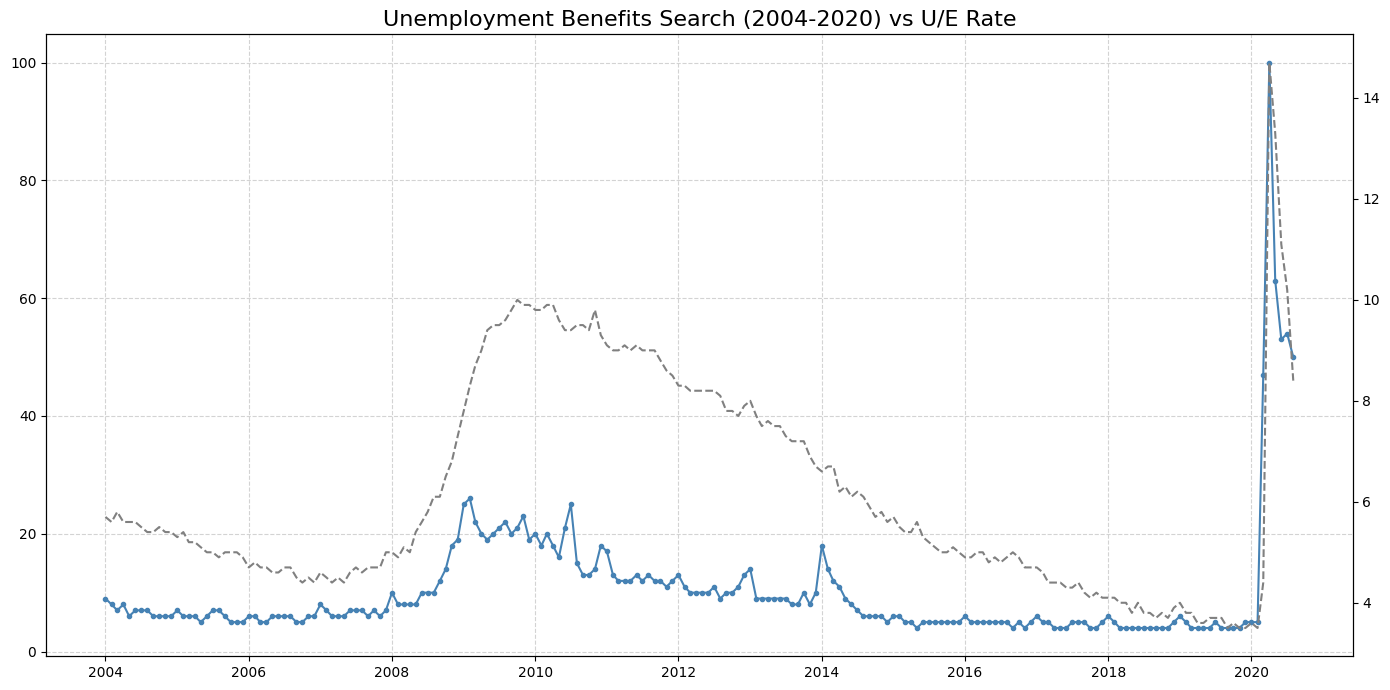

In [37]:
# If loaded, plot the 2004-20 unemployment search vs rate
if 'df_unemployment_2020' in globals():
    ue_search_col2020 = [c for c in df_unemployment_2020.columns if 'SEARCH' in c.upper() or 'BENEFIT' in c.upper()][0]
    ue_rate_col2020 = [c for c in df_unemployment_2020.columns if 'RATE' in c.upper() or 'UNRATE' in c.upper()][0]
    fig, ax1 = plt.subplots(figsize=(14,7), dpi=100)
    ax1.plot(df_unemployment_2020['MONTH'], df_unemployment_2020[ue_search_col2020], color='steelblue', marker='o', markersize=3)
    ax2 = ax1.twinx()
    ax2.plot(df_unemployment_2020['MONTH'], df_unemployment_2020[ue_rate_col2020], color='grey', linestyle='--')
    ax1.grid(True, linestyle='--', color='lightgrey')
    plt.title('Unemployment Benefits Search (2004-2020) vs U/E Rate', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print('df_unemployment_2020 not found — run previous cell to load the file.')

In [38]:
# Final simple checks: print shapes and column names of the dataframes to confirm everything is present
print('df_tesla shape:', df_tesla.shape)
print('df_btc_monthly shape:', df_btc_monthly.shape)
print('df_btc_search shape:', df_btc_search.shape)
print('df_unemployment shape:', df_unemployment.shape)
try:
    print('df_unemployment_2020 shape:', df_unemployment_2020.shape)
except NameError:
    pass

df_tesla shape: (124, 3)
df_btc_monthly shape: (73, 3)
df_btc_search shape: (73, 2)
df_unemployment shape: (181, 3)
df_unemployment_2020 shape: (200, 3)
